# QUESTION 1

Our goal is to maximize $k+\alpha$, with $f_a\in C^{k,\alpha}([-1,1]), a>0$.

We want $f_a^{(k)}$ to be continuous, for the highest possible $k$. 

We assume that for some $k^*, \alpha^*$, $f_a\in C^{k^*,\alpha^*}([-1,1])$, there exists $k\geqslant k^*+1$ such that $f_a\in C^{k,\alpha}([-1,1])$ for some $0<\alpha\leqslant1$.

We obtain that $k+\alpha-(k^*+\alpha^*)=(k-k^*)-(\alpha-\alpha^*)\geqslant1-1=0$. $\Rightarrow k+\alpha\geqslant k^*+\alpha^*$.

We want to find this maximal $k$. For $f_a$ to be $k$ times continuously differentiable, we need $\lim_{x\to0^+} x^{a^{(k)}}=0$ as $f_a^{(k)}(x)=0$ for $x\leqslant0$. For this to happen, we need the exponent of the $k^{th}$ derivative of $x^a$ to be positive. That is:$$k=\begin{cases}\lfloor a\rfloor &a\notin \mathbb{N} \\ a-1  &a \in \mathbb{N}\end{cases}$$

Now that we found $k$, we can search for the maximal $\alpha$.

We have $f_a\in C^k([-1,1])$, and we want $f_a^{(k)}\in C^{0,\alpha}([-1,1])$, that is for $0<\alpha\leqslant1$, $$sup_{-1\leqslant x < y \leqslant 1} \frac{|f_a^{(k)}(x)-f_a^{(k)}(y)|}{|x-y|^\alpha}< \infty$$

We know that $f_a^{(k)}(x)=Cx^b$ with $0<b\leqslant 1$, with $C$ the product of the powers of $x$ to obtain the derivative, and $b=1$ if $a\in \mathbb{N}$, $b=a-\lfloor a\rfloor$ if $a \notin \mathbb{N}$, ie the fractionnal part of $a$.

Let $\alpha>b$. We get:

$$sup_{-1\leqslant x < y \leqslant 1} \frac{|f_a^{(k)}(x)-f_a^{(k)}(y)|}{|x-y|^\alpha}=sup_{0\leqslant x < y \leqslant 1} \frac{|Cx^b-Cy^b|}{|x-y|^\alpha} \geqslant sup_{0\leqslant x \leqslant 1} \frac{|C(2x)^b-Cx^b|}{|2x-x|^\alpha}\\ =C(2^b-1).sup_{0\leqslant x \leqslant 1} \frac{|x|^b}{|x|^\alpha} = \infty$$
by taking $x \rightarrow 0$, and the $1^{st}$ equality coming from the fact that the $k^{th}$ derivative is constant $0$ on $[-1,0]$, and continuous in $[-1,1]$.

Hence $f_a^{(k)}$ is not $\alpha$-Holder continuous.

Now, let $\alpha \leqslant b$. We get:

$$sup_{-1\leqslant x < y \leqslant 1} \frac{|f_a^{(k)}(x)-f_a^{(k)}(y)|}{|x-y|^\alpha}=C.sup_{-1\leqslant x < y \leqslant 1} \frac{|x^b-y^b|}{|x-y|^\alpha} \leqslant C.sup_{-1\leqslant x < y \leqslant 1} \frac{|x-y|^b}{|x-y|^\alpha} < \infty$$

Hence $f_a^{(k)}$ is not $b$-Holder continuous.

So $k+\alpha$ is maximal, with $f_a\in C^{k,\alpha}([-1,1])$ when:

$$ (k, \alpha) = \begin{cases}(\lfloor a \rfloor +1, a-\lfloor a \rfloor) &a \notin \mathbb{N}\\
(a-1, 1) &a \in \mathbb{N}\end{cases}$$

# QUESTION 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.interpolate as sc
import scipy.special
import random
from PIL import Image

In [2]:
def fun1(a,x):
    if x <= 0:
        return 0
    else:
        return np.power(x,a)

In [3]:
def intervals(n):
    return np.linspace(-1,1,n)

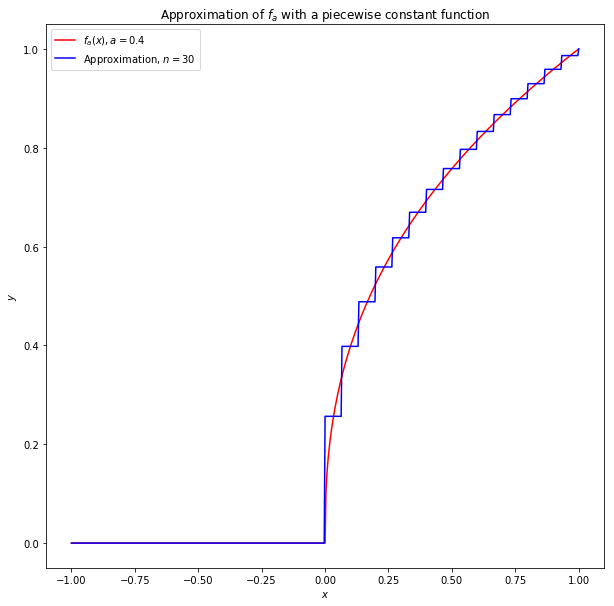

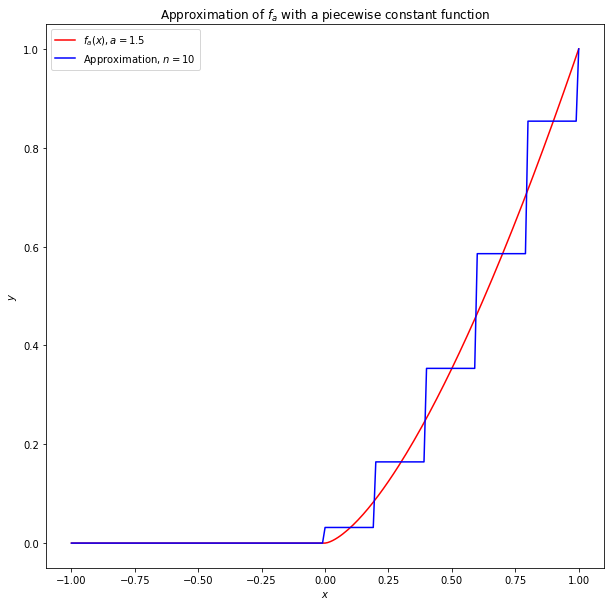

In [177]:
def question2(a,n):
    num_points=n*20
    interval=intervals(n+1)
    points=np.linspace(-1,1,num_points+1)
    middle=[]
    aprox=[]
    function1=[]
    function2=[]
    for i in range(0,n):
        middle=middle+[(interval[i]+interval[i+1])/2]
    for i in range(0,n):
        aprox=aprox+[fun1(a,middle[i])]
    for i in points:
        function1=function1+[fun1(a,i)]
    for i in range(0,n):
        for j in range(0,20):
            function2=function2+[aprox[i]]
    function2=function2+[1]
    return function1, function2

n=30
a=0.4
function1, function2 = question2(a,n)
fig=plt.figure(figsize=(10,10))
plt.title('Approximation of $f_a$ with a piecewise constant function')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(np.linspace(-1,1,20*n+1),function1,'red',label="$f_a(x), a=0.4$")
plt.plot(np.linspace(-1,1,20*n+1),function2,'blue',label="Approximation, $n=30$")
plt.legend()
plt.show()

n=10
a=1.5
function3, function4 = question2(a,n)
fig=plt.figure(figsize=(10,10))
plt.title('Approximation of $f_a$ with a piecewise constant function')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(np.linspace(-1,1,20*n+1),function3,'red',label="$f_a(x), a=1.5$")
plt.plot(np.linspace(-1,1,20*n+1),function4,'blue',label="Approximation, $n=10$")
plt.legend()
plt.show()

#### To approximate $f_a$ by a constant function, I used the suggested way, the midpoint method.

#### Now, to compute the error in the max norm, we begin with heuristic.

#### If $a>=1$, the derivative of $f_a$ is clearly the highest at $x=1$, and so the maximal error is attained at $x=1$.

#### If $a<1$, the derivative of $f_a$ is clearly the highest at $x=0$, and so the maximal error is attained at $x=\frac{1}{n}$, by a simple study of the parity of $n$.

In [5]:
def error2(a,n):
    if a>=1:
        return 1-fun1(a,1-1/n)
    else:
        return fun1(a,1/n)

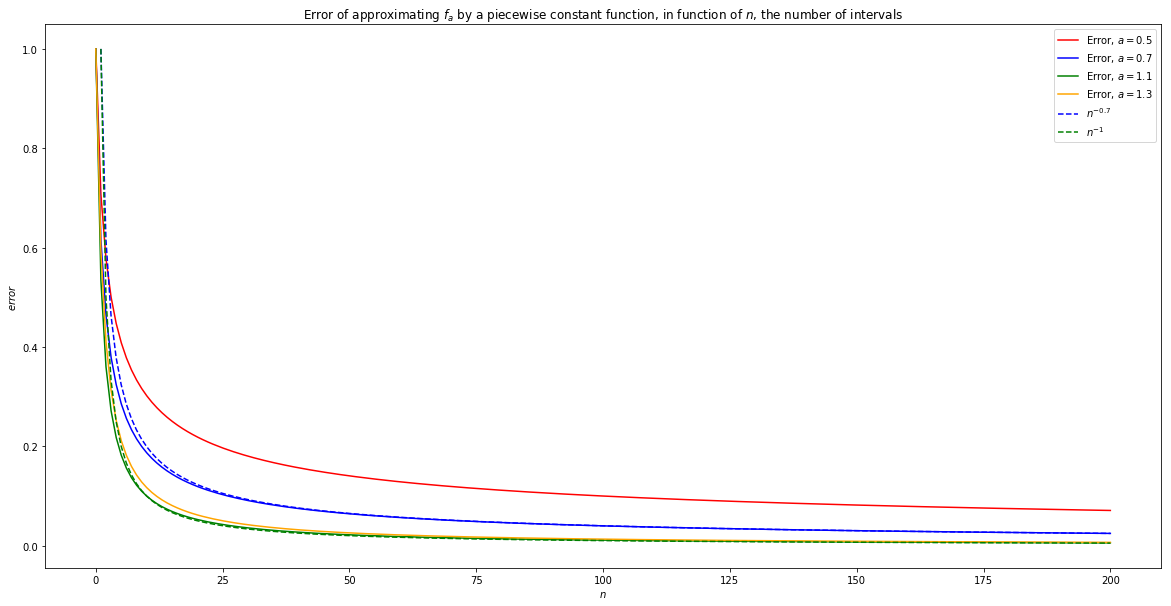

In [195]:
a1=0.5
fa1=[]
for i in range(1,201):
    fa1=fa1+[error2(a1,i)]
a2=0.7
fa2=[]
for i in range(1,201):
    fa2=fa2+[error2(a2,i)]
a3=1.1
fa3=[]
for i in range(1,201):
    fa3=fa3+[error2(a3,i)]
a4=1.3
fa4=[]
for i in range(1,201):
    fa4=fa4+[error2(a4,i)]

fig=plt.figure(figsize=(20,10))    
plt.title('Error of approximating $f_a$ by a piecewise constant function, in function of $n$, the number of intervals')
plt.xlabel('$n$')
plt.ylabel('$error$')
plt.plot(np.linspace(0,200,200),fa1,'red',label="Error, $a=0.5$")
plt.plot(np.linspace(0,200,200),fa2,'blue',label="Error, $a=0.7$")
plt.plot(np.linspace(0,200,200),fa3,'green',label="Error, $a=1.1$")
plt.plot(np.linspace(0,200,200),fa4,'orange',label="Error, $a=1.3$")
plt.plot(np.linspace(1,200,200),np.power(np.linspace(1,200,200),-0.7),'b--',label="$n^{-0.7}$")
plt.plot(np.linspace(1,200,200),np.power(np.linspace(1,200,200),-1),'g--',label="$n^{-1}$")
plt.legend()
plt.show()

#### First of all, the rate of convergence $r$ depends on the regularity of $f_a$ the following way: when $a<1$, the function is less regular than $a=1$, and $r$ decreases when $a$ decreases. Also when $a>1$, the function is more regular than $a=1$, but $r$ also decreases. So the "best case" for the convergence of the error is when $a\approx1$.

#### By playing with the $r$ in the $n^{-r}$, we can have a guess at the dependance $r=r(a)$:

#### -If $a\geqslant1$, and $a$ close to $1$ we conjecture that $r(a)=1$, as the curve $n^{-1}$ is very similar to the error curves for $a>=1$ in the above plot.

#### -If $a<1$, we conjecture that $r(a)=a$, as the curve $n^{-a}$ is quasi identical to the corresponding error curve.

#### We also see that the asymptotic regime starts very fast. 

#### We can conclude that in the best case, ($a\approx 1$), we will have a linear convergence of the error.

# QUESTION 3

In [7]:
def d_f_dx(a,x):
    if x>0:
        return a*np.power(x,a-1)
    else:
        return 0

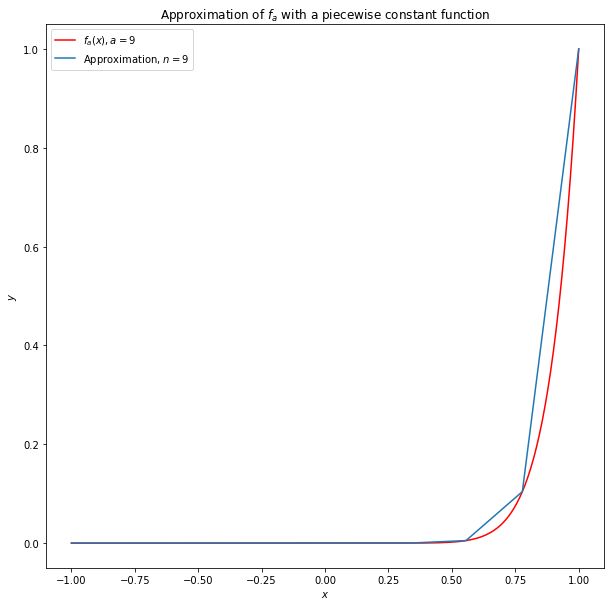

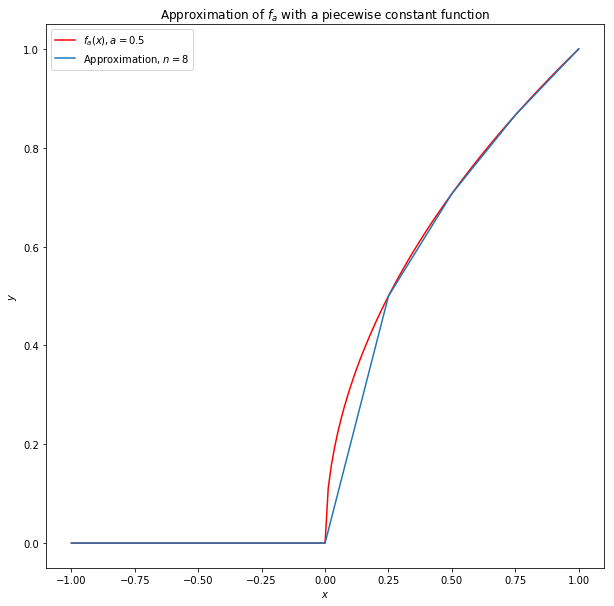

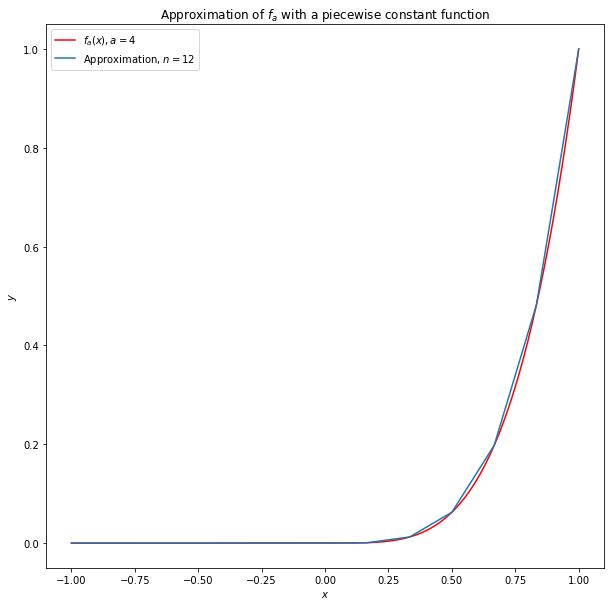

In [188]:
def question3(a,n):
    num_points=n*20
    interval=intervals(n+1)
    points=np.linspace(-1,1,num_points+1)
    middle=[]
    aprox=[]
    function1=[]
    function2=[]
    for i in range(0,n):
        middle=middle+[(interval[i]+interval[i+1])/2]
    for i in range(0,n):
        aprox=aprox+[(fun1(a,middle[i]+1/n)+fun1(a,middle[i]-1/n))/(1/n)]
    for i in points:
        function1=function1+[fun1(a,i)]
    for i in range(0,n):
        for j in range(0,20):
            function2=function2+[fun1(a,middle[i]-1/n)+(j/20)*(2/n)*(fun1(a,middle[i]+1/n)-fun1(a,middle[i]-1/n))*n/2]
    function2=function2+[1]
    return function1, function2

n=9
a=9
function1, function2 = question3(a,n)
fig=plt.figure(figsize=(10,10))
plt.title('Approximation of $f_a$ with a piecewise constant function')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(np.linspace(-1,1,20*n+1),function1,'red',label="$f_a(x), a=9$")
plt.plot(np.linspace(-1,1,20*n+1),function2, label="Approximation, $n=9$")
plt.legend()
plt.show()

n=8
a=0.5
function1, function2 = question3(a,n)
fig=plt.figure(figsize=(10,10))
plt.title('Approximation of $f_a$ with a piecewise constant function')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(np.linspace(-1,1,20*n+1),function1,'red',label="$f_a(x), a=0.5$")
plt.plot(np.linspace(-1,1,20*n+1),function2, label="Approximation, $n=8$")
plt.legend()
plt.show()

n=12
a=4
function1, function2 = question3(a,n)
fig=plt.figure(figsize=(10,10))
plt.title('Approximation of $f_a$ with a piecewise constant function')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(np.linspace(-1,1,20*n+1),function1,'red',label="$f_a(x), a=4$")
plt.plot(np.linspace(-1,1,20*n+1),function2, label="Approximation, $n=12$")
plt.legend()
plt.show()

#### To approximate $f_a$ by a piecewise linear function, I used the following method: for all the points in an interval, they are on the segment joining $f_a$ applied to the beginning and the end of the interval.

#### Now, to compute the error in the max norm, we will simply compute the error at each point, and take the highest.

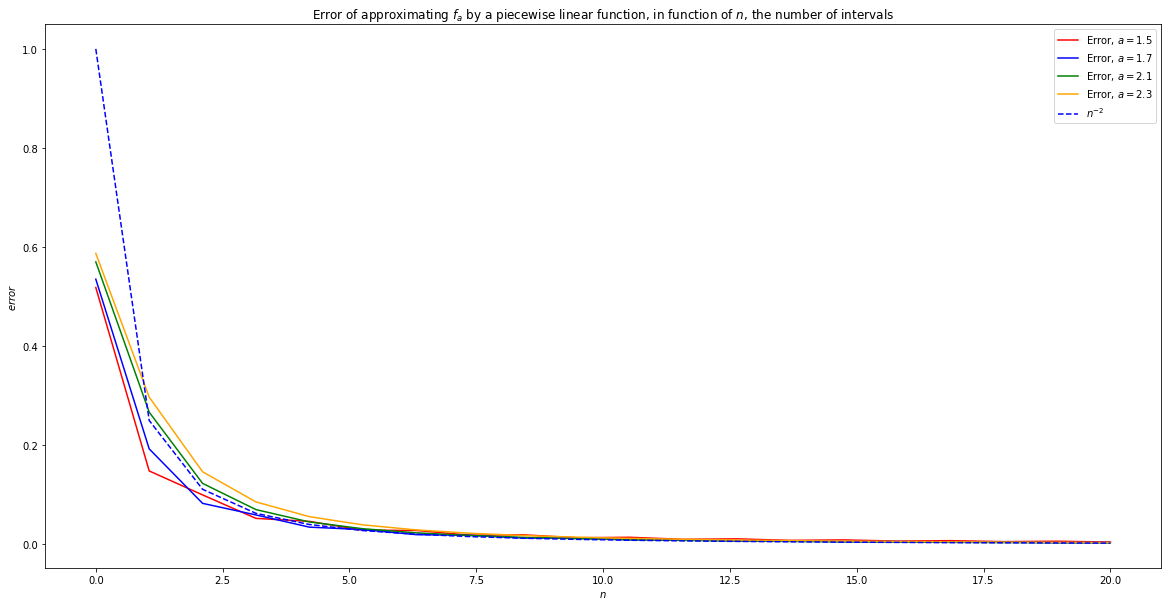

In [198]:
def error3(function1, function2, n):
    error=0
    for i in range(0,20*n+1):
        if np.absolute(function1[i]-function2[i]) > error:
            error=np.absolute(function1[i]-function2[i])
    return error

a1=1.5
e1=[]
help1=[]
for i in range(1,21):
    function1, function2 = question3(a1,i)
    e1=e1+[error3(function1,function2,i)]
    help1=help1+[i]
a2=1.7
e2=[]
for i in range(1,21):
    function1, function2 = question3(a2,i)
    e2=e2+[error3(function1,function2,i)]
a3=2.1
e3=[]
for i in range(1,21):
    function1, function2 = question3(a3,i)
    e3=e3+[error3(function1,function2,i)]
a4=2.3
e4=[]
for i in range(1,21):
    function1, function2 = question3(a4,i)
    e4=e4+[error3(function1,function2,i)]

fig=plt.figure(figsize=(20,10))    
plt.title('Error of approximating $f_a$ by a piecewise linear function, in function of $n$, the number of intervals')
plt.xlabel('$n$')
plt.ylabel('$error$')
plt.plot(np.linspace(0,20,20),e1,'red',label="Error, $a=1.5$")
plt.plot(np.linspace(0,20,20),e2,'blue',label="Error, $a=1.7$")
plt.plot(np.linspace(0,20,20),e3,'green',label="Error, $a=2.1$")
plt.plot(np.linspace(0,20,20),e4,'orange',label="Error, $a=2.3$")
plt.plot(np.linspace(0,20,20),np.power(np.linspace(1,20,20),-2),'b--',label="$n^{-2}$")
plt.legend()
plt.show()

#### First of all, the rate of convergence $r$ depends on the regularity of $f_a$ the following way: when $a<2$, the function is less regular than $a=2$, and $r$ decreases when $a$ decreases. Also when $a>2$, the function is more regular than $a=2$, but $r$ also decreases. So the "best case" for the convergence of the error is when $a=2$.

#### Again, we see the that the asymptotic behaviour begins soon, and we see that the error follows the $n^{-2}$ curve, so $r(a)=2$, no matter the value of $a$, when $a\approx 2$.

#### We can conclude that in the best case, ($a\approx 2$), we will have a quadratic convergence of the error.

#### Thus if we compare the $2$ approximations best-case to best-case, we conclude that the piecewise linear approximation is better than the piecewise constant approximation, as the error converges to $0$ quadratically instead of linearly. This seems logical as $f_a$ is increasing fastly, and vertically on $[0,1]$, and so on a same interval, a linear curve from the 2 endpoints will approximate better than an horizontal curve.

# QUESTION 4

In [59]:
def bernstein_coef(n):
    coef = []
    for i in range(0,n+1):
        coef = coef + [scipy.special.binom(n,i)*fun1(a,-1+2*i/n)]
    return coef

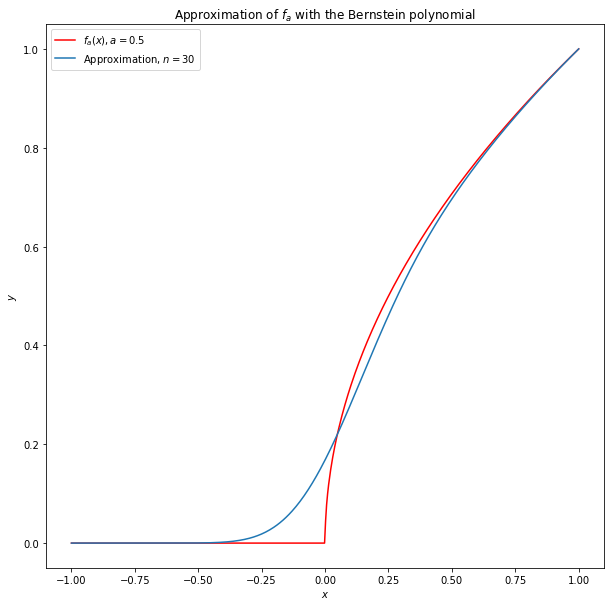

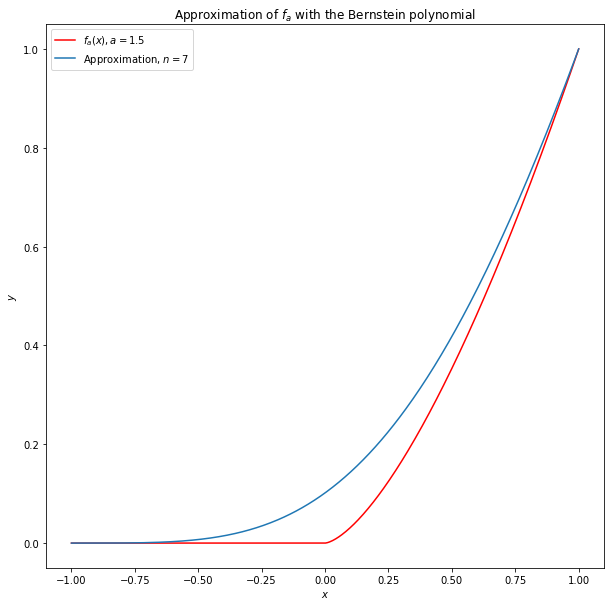

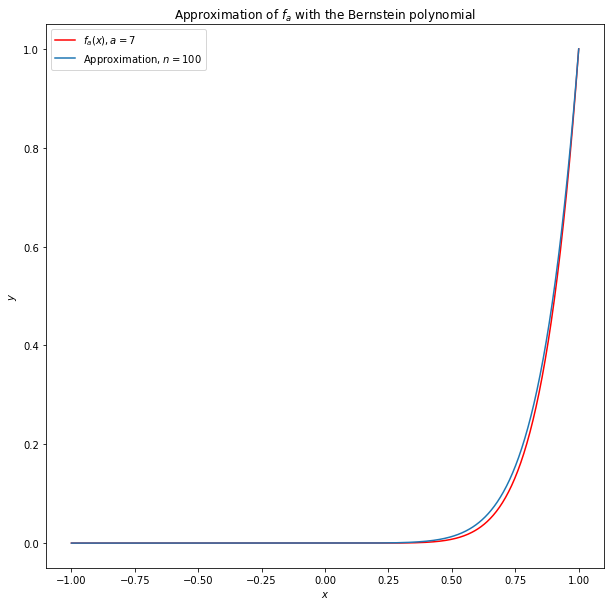

In [137]:
def question4(a,n):
    xlist = np.linspace(-1,1,500)
    function2 = []
    poly = bernstein_coef(n)
    for i in xlist:
        value = 0
        degree = 0
        for j in poly:
            value = value + pow((i+1)/2,degree)*j*pow((1-i)/2,n-degree)
            degree = degree + 1
        function2 = function2 + [value]
    function1=[]
    for x in xlist:
        function1=function1+[fun1(a,x)]
    return function1, function2

a=0.5
n=30
function1, function2 = question4(a,n)
fig=plt.figure(figsize=(10,10))
plt.title('Approximation of $f_a$ with the Bernstein polynomial')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(np.linspace(-1,1,500),function1,'red',label="$f_a(x), a=0.5$")
plt.plot(np.linspace(-1,1,500),function2, label="Approximation, $n=30$")
plt.legend()
plt.show()

a=1.5
n=7
function1, function2 = question4(a,n)
fig=plt.figure(figsize=(10,10))
plt.title('Approximation of $f_a$ with the Bernstein polynomial')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(np.linspace(-1,1,500),function1,'red',label="$f_a(x), a=1.5$")
plt.plot(np.linspace(-1,1,500),function2, label="Approximation, $n=7$")
plt.legend()
plt.show()

a=7
n=100
function1, function2 = question4(a,n)
function=np.abs([a - b for a, b in zip(function1, function2)])
fig=plt.figure(figsize=(10,10))
plt.title('Approximation of $f_a$ with the Bernstein polynomial')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(np.linspace(-1,1,500),function1,'red',label="$f_a(x), a=7$")
plt.plot(np.linspace(-1,1,500),function2, label="Approximation, $n=100$")
#plt.plot(np.linspace(-1,1,500),function, label="difference")
plt.legend()
plt.show()

#### I mostly used the code I did for the midterm, and made sure to scale from $[0,1]$ to $[-1,1]$.

#### Now, I compute the error as previously.

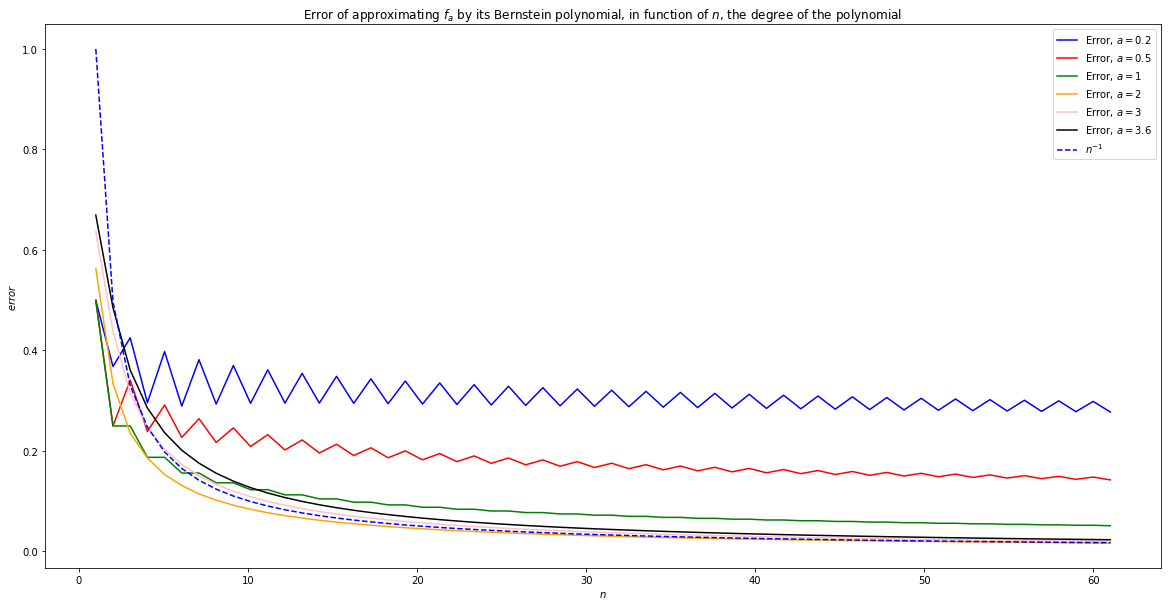

In [228]:
def error4(function1, function2, n):
    error=0
    for i in range(0,500):
        if np.abs(function1[i]-function2[i]) > error:
            error=np.abs(function1[i]-function2[i])
    return error
#Had a problem to plot the functions together, so I did them separately, saved the array, and plot them all together
a1=0.2
e1=[0.4989979959919839, 0.3673040018039595, 0.4246736184488368, 0.29528423623345956, 0.39720411971445213, 0.28858217434544137, 0.380888772343937, 0.29256417334627344, 0.3694601890764531, 0.294173040979329, 0.3607392940765426, 0.29464182802952055, 0.35372557485447037, 0.2945073349629816, 0.3478807078009299, 0.29403471295867034, 0.34288335476689497, 0.29336675013624497, 0.3385270403107662, 0.2925852514503522, 0.3346715795601992, 0.2917392616944758, 0.3312176312309077, 0.29085918278210554, 0.32809234402025594, 0.289964315094243, 0.32524077328728057, 0.2890671039793767, 0.32262049898233963, 0.288175636201153, 0.32019811553907385, 0.28729516097506197, 0.3179468654738623, 0.28642904492754995, 0.3158449981788648, 0.28557938705592106, 0.3138746034236401, 0.2847474233675794, 0.3120207643099688, 0.2839337980550106, 0.3102709304739225, 0.28313874807501144, 0.3086144464245382, 0.28236223043907116, 0.3070421912604238, 0.2816040109513222, 0.3055462997266272, 0.28086372661092646, 0.304119943597182, 0.28014092978606925, 0.3027571584268572, 0.2794351196248636, 0.30145270486019027, 0.27874576443990423, 0.3002019565701115, 0.2780723176539636, 0.2990008089371943, 0.2774142291190605, 0.29784560404237154, 0.27677095309119576]
'''for j in range(1,61):
    function1=[]
    function2=[]
    function12=[]
    function1, function2 = question4(a2,j)
    function12=np.absolute([a - b for a, b in zip(function1, function2)])
    e2=e2+[np.max(function12)] '''
a2=0.5
e2=[0.4989979959919839, 0.24899900000401598, 0.34032160473186307, 0.23806867631340717, 0.29071524992651443, 0.22614613457193694, 0.2633616262736455, 0.2162403050837399, 0.2451064093247527, 0.2080527895614037, 0.23167017753385702, 0.2011658584819082, 0.2211718398666925, 0.19526577276910315, 0.21263167911970743, 0.1901299008453509, 0.2054798945448194, 0.18559894499768353, 0.1993582202421711, 0.18155647921788, 0.1940279052074002, 0.17791545172625017, 0.1893225027201363, 0.17460937103809285, 0.18512171550220427, 0.1715864663339873, 0.18133600024595775, 0.1688057358337229, 0.17789704887588262, 0.1662342128851638, 0.17475165884662539, 0.16384503391314176, 0.17185764821802305, 0.16161604586430403, 0.16918105252705523, 0.15952878423094255, 0.1666941519481966, 0.15756771061451633, 0.16437405178659012, 0.15571963535234754, 0.16220164102984969, 0.1539732742976176, 0.1601608149496549, 0.15231890433163126, 0.15823788577157039, 0.1507480925568789, 0.15642112966577726, 0.14925348118293744, 0.15470043412398823, 0.14782861500707217, 0.1530670203264342, 0.146467801827658, 0.1515132222624592, 0.14516599857730011, 0.15003230931784897, 0.14391871773037776, 0.14861834251862846, 0.14272194983154912, 0.14726605709892238, 0.14157209894640746]
'''for j in range(1,61):
    function1=[]
    function2=[]
    function11=[]
    function1, function2 = question4(a1,j)
    function11=np.absolute([a - b for a, b in zip(function1, function2)])
    e1=e1+[np.max(function11)]''' 
a3=1
e3=[0.498997995991984, 0.2489990000040161, 0.2489990000040161, 0.1864995020090241, 0.18649950200902413, 0.15524987851202407, 0.15524987851202404, 0.13571894226389403, 0.13571894226389403, 0.12204734179622895, 0.12204734179622896, 0.11179368262483429, 0.11179368262483429, 0.10373726848810101, 0.10373726848810103, 0.09719145829039962, 0.09719145829039964, 0.09173663836588912, 0.0917366383658891, 0.08710006005085161, 0.08710006005085162, 0.08309575849666975, 0.08309575849666975, 0.07959200870804495, 0.07959200870804498, 0.07649255018880909, 0.0764925501888091, 0.0737251876248258, 0.07372518762482583, 0.071234571319716, 0.071234571319716, 0.0689774593579169, 0.0689774593579169, 0.06691951259877003, 0.06691951259876996, 0.06503306897896419, 0.06503306897896419, 0.06329556209655599, 0.06329556209655597, 0.06168837468489634, 0.06168837468489634, 0.06019599236757277, 0.06019599236757275, 0.05880536897489963, 0.058805368974899616, 0.057505443632767154, 0.05750544363276715, 0.056286768518795514, 0.0562867685187955, 0.055141218512264625, 0.0551412185122646, 0.05406176226435305, 0.054061762264353046, 0.05304227990229884, 0.05304227990229879, 0.05207741654173646, 0.05207741654173646, 0.051162463581230326, 0.05116246358123031, 0.050293261759519856]
'''for j in range(1,61):
    function1=[]
    function2=[]
    function13=[]
    function1, function2 = question4(a3,j)
    function13=np.absolute([a - b for a, b in zip(function1, function2)])
    e3=e3+[np.max(function13)]'''
a4=2
e4=[0.562499748996992, 0.33333199465062385, 0.23456686023562573, 0.18518429302812672, 0.1522771429478023, 0.1303595222817353, 0.113686182926412, 0.10120145815470524, 0.09105706301305933, 0.08295466941872162, 0.07610399439240641, 0.07040513213836724, 0.06545660369876007, 0.06122198303786386, 0.05747337751308154, 0.0541989255066688, 0.05125797847669497, 0.048647614553240126, 0.04627604717555084, 0.04414432644664404, 0.04219113363123114, 0.04041743676181139, 0.0387784975885975, 0.03727915271005089, 0.035884838363500704, 0.034599434561268363, 0.03339842558688157, 0.03228404643173126, 0.031238436922771604, 0.030262982636905633, 0.029344153851564553, 0.02848312404573325, 0.027669056634439436, 0.02690342002508799, 0.026176890599302637, 0.0254916351826975, 0.024839020688622503, 0.02422209708782868, 0.02363314325293004, 0.02307410238756448, 0.022539957768888272, 0.02203124860824425, 0.021544157694260248, 0.021079667250253044, 0.020633518125604385, 0.020207319936443716, 0.01979767416265263, 0.019405096962769555, 0.01902710131075748, 0.01866479360349524, 0.018315170417060697, 0.017978994276258202, 0.017654818624758796, 0.017342756070320535, 0.017040860254051687, 0.01674981786528698, 0.016468534096251444, 0.016196949767527433, 0.01593363847189539, 0.01567913819679076]
'''for j in range(1,61):
    function1=[]
    function2=[]
    function13=[]
    function1, function2 = question4(a4,j)
    function13=np.absolute([a - b for a, b in zip(function1, function2)])
    e4=e4+[np.max(function13)]'''
a5=3
e5=[0.6360707883412376, 0.4374965091896087, 0.314216355636474, 0.24675485200687985, 0.2028930714227008, 0.17249523188258764, 0.15000337216044624, 0.13274965862216298, 0.11904955795519861, 0.10792658443670089, 0.09870499114721473, 0.0909403012921968, 0.08430714752659876, 0.07857709801804799, 0.07357577230257081, 0.06917333626403668, 0.06526759903296245, 0.06177937603540565, 0.05864482012243674, 0.055812921985536945, 0.05324173545585034, 0.050896933249944654, 0.04874981976707654, 0.046776453414501706, 0.04495653905332375, 0.043272873635030046, 0.041710697789128254, 0.04025733464096404, 0.03890179356770537, 0.037634528692697844, 0.03644718746186704, 0.03533244550040049, 0.03428384171566454, 0.03329566311048726, 0.03236283343753554, 0.031480831411659194, 0.03064561356718848, 0.029853555234512413, 0.029101395866319324, 0.028386195802619224, 0.02770529673425004, 0.027056289594045463, 0.026436985451112005, 0.025845391358676584, 0.02527968858297247, 0.02473821421930253, 0.024219444673041796, 0.02372198151087626, 0.023244538764777917, 0.02278593192999359, 0.022345068093168302, 0.021920937294554965, 0.02151260477055078, 0.021119204110849027, 0.020739931103412962, 0.020374038267804984, 0.020020829928167033, 0.01967965781143896, 0.019349917071046024, 0.019031042716313368]
a6=3.6
e6=[0.6689906860632927, 0.48441931196905996, 0.3603776264093538, 0.28487648746726724, 0.2355105754469976, 0.2006753291956017, 0.17483033769964346, 0.15489023242901068, 0.1390322055853369, 0.12613010077202963, 0.11541719499213404, 0.10637989697633932, 0.09865434279509275, 0.09198088311163719, 0.0861525628627273, 0.08101842524167843, 0.07646150323834153, 0.07238965548590034, 0.06872938063182574, 0.06542129332467886, 0.06241691516726802, 0.05967626698035303, 0.05716609356067823, 0.05485850194545558, 0.05272992608017438, 0.05076031711255111, 0.048932512282522794, 0.04723173283740181, 0.04564518460105868, 0.04416187715458053, 0.04277233225962901, 0.04146754406658898, 0.04023998887602975, 0.03908300771164219, 0.0379906856113692, 0.036957750530201505, 0.035979488327150755, 0.035051670867728646, 0.0341704949810549, 0.033332530379866, 0.03253467506292368, 0.03177411696298005, 0.03104830085139737, 0.030354899672188795, 0.029691789632723453, 0.02905702848653413, 0.02844883654271818, 0.027865580009604873, 0.02730575634548904, 0.026767981339307356, 0.026250977687908572, 0.025753564871246026, 0.0252746501568204, 0.024813220589002316, 0.024368335839782762, 0.023939121814727182, 0.023524764922720598, 0.023124506930454036, 0.022737640333221676, 0.022363504182573324]
fig=plt.figure(figsize=(20,10))    
plt.title('Error of approximating $f_a$ by its Bernstein polynomial, in function of $n$, the degree of the polynomial')
plt.xlabel('$n$')
plt.ylabel('$error$')
plt.plot(np.linspace(1,61,60),e1,'blue',label="Error, $a=0.2$")
plt.plot(np.linspace(1,61,60),e2,'red',label="Error, $a=0.5$")
plt.plot(np.linspace(1,61,60),e3,'green',label="Error, $a=1$")
plt.plot(np.linspace(1,61,60),e4,'orange',label="Error, $a=2$")
plt.plot(np.linspace(1,61,60),e5,'pink',label="Error, $a=3$")
plt.plot(np.linspace(1,61,60),e6,'black',label="Error, $a=3.6$")
plt.plot(np.linspace(1,61,60),np.power(np.linspace(1,61,60),-0.),'b--',label="$n^{-1}$")
plt.legend()
plt.show()

#### First of all, the rate of convergence $r$ depends on the regularity of $f_a$ the following way: when $a<2.5$, the function is less regular than $a=2.5$, and $r$ decreases when $a$ decreases. Also when $a>2.5$, the function is more regular than $a=2.5$, but $r$ also decreases. So the "best case" for the convergence of the error is when $a\approx2.5$.

#### We see oscillation, probably due to the parity of $n$.

#### We see that at the best case $a\approx2.5$, $r(a)=1$, so this method gives at best a linear convergence, but slower than the piecewise constant convergence.

#### So we can conclude that the approximation of $f_a$ is better with piecewise functions. Probably due to the fact that $f_a$ is $0$ for $x\leqslant0$, but in the Bernstein polynomial, the approximation is not $0$ when $x\leqslant0$, unlike the piecewise approximations.

#### A difference with the previous approximations is that there is a linear convergence for a bigger radius around the "best case" $a$: on the above plot, we see that the approximation from $a=2$ to $a=3.6$ is very similar, and linear. In the previous approximations, there was convergence around a smaller interval of the best $a$, ie: linear convergence for piecewise constant for $a$ close to $1$, and quadratic convergence for piecewise linear for $a$ close to $2$, and in both cases, the "close" means at most far from $0.3$.

# QUESTION 5

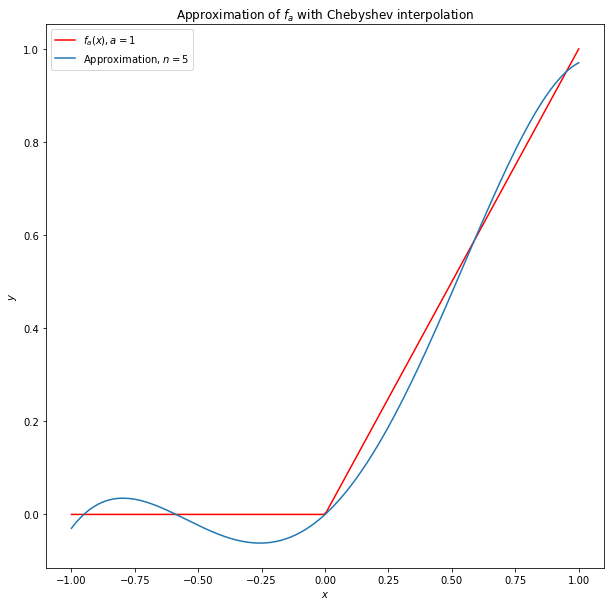

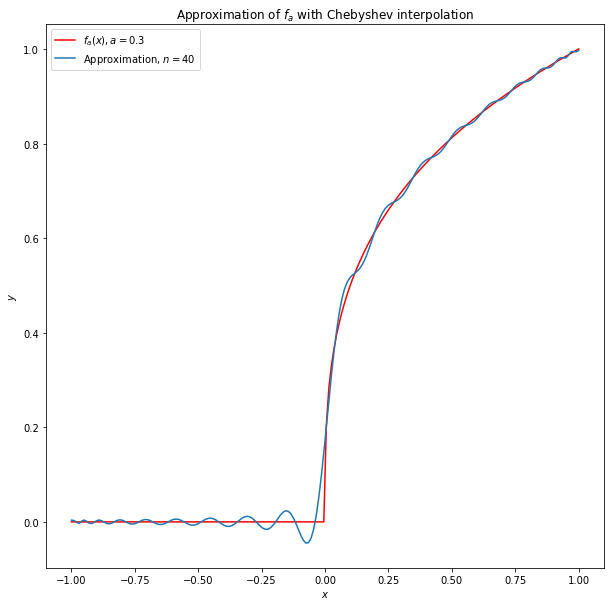

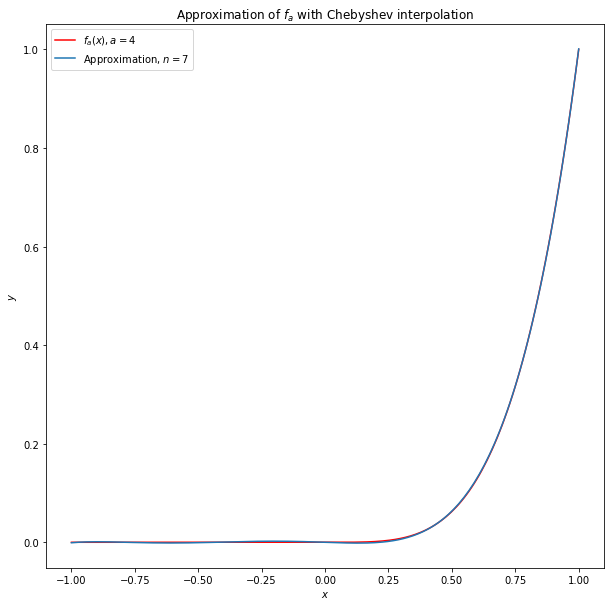

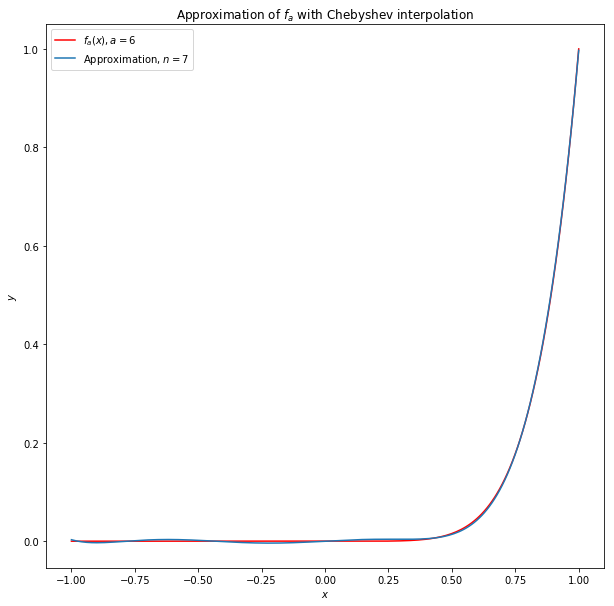

In [256]:
def cheb_nodes(a,b,n):
    array = []
    for i in range(1,n+1):
        array = array + [np.cos((2*i-1)*np.pi/(2*n))]
    array = np.sort(array)
    return array

def lagrange_coef(xpoints,ypoints,n):
    vandermonde = []
    for i in range(0,n):
        sub = []
        for j in range(0,n):
            sub = sub + [pow(xpoints[i],j)]
        vandermonde = vandermonde + [sub]
    return np.flip(np.linalg.solve(np.matrix(vandermonde),ypoints),0)

def question5(a,n):
    xpoints = cheb_nodes(-1,1,n)
    function0 = []
    for x in xpoints:
        function0 = function0 + [fun1(a,x)]

    poly = lagrange_coef(xpoints,function0,n)
    ###plot the Lagrange polynomial for n=10
    xlist = np.linspace(-1,1,200)
    function2 = []
    for i in xlist:
        value = 0
        degree = n - 1
        for j in poly:
            value = value + pow(i,degree)*j
            degree = degree - 1
        function2 = function2 + [value]
    return function2

def fun(a,n):
    f=[]
    xlist=np.linspace(-1,1,200)
    for x in xlist:
        f=f+[fun1(a,x)]
    return f

a=1
n=5
function1 = fun(a,n)
function2 = question5(a,n)
fig=plt.figure(figsize=(10,10))
plt.title('Approximation of $f_a$ with Chebyshev interpolation')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(np.linspace(-1,1,200),function1,'red',label="$f_a(x), a=1$")
plt.plot(np.linspace(-1,1,200),function2, label="Approximation, $n=5$")
plt.legend()
plt.show()

a=0.3
n=40
function1 = fun(a,n)
function2 = question5(a,n)
fig=plt.figure(figsize=(10,10))
plt.title('Approximation of $f_a$ with Chebyshev interpolation')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(np.linspace(-1,1,200),function1,'red',label="$f_a(x), a=0.3$")
plt.plot(np.linspace(-1,1,200),function2, label="Approximation, $n=40$")
plt.legend()
plt.show()

a=4
n=7
function1 = fun(a,n)
function2 = question5(a,n)
fig=plt.figure(figsize=(10,10))
plt.title('Approximation of $f_a$ with Chebyshev interpolation')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(np.linspace(-1,1,200),function1,'red',label="$f_a(x), a=4$")
plt.plot(np.linspace(-1,1,200),function2, label="Approximation, $n=7$")
plt.legend()
plt.show()

a=6
n=7
function1 = fun(a,n)
function2 = question5(a,n)
fig=plt.figure(figsize=(10,10))
plt.title('Approximation of $f_a$ with Chebyshev interpolation')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(np.linspace(-1,1,200),function1,'red',label="$f_a(x), a=6$")
plt.plot(np.linspace(-1,1,200),function2, label="Approximation, $n=7$")
plt.legend()
plt.show()

#### I used the same code as for the midterm, and I use the same method for the computation of the error.

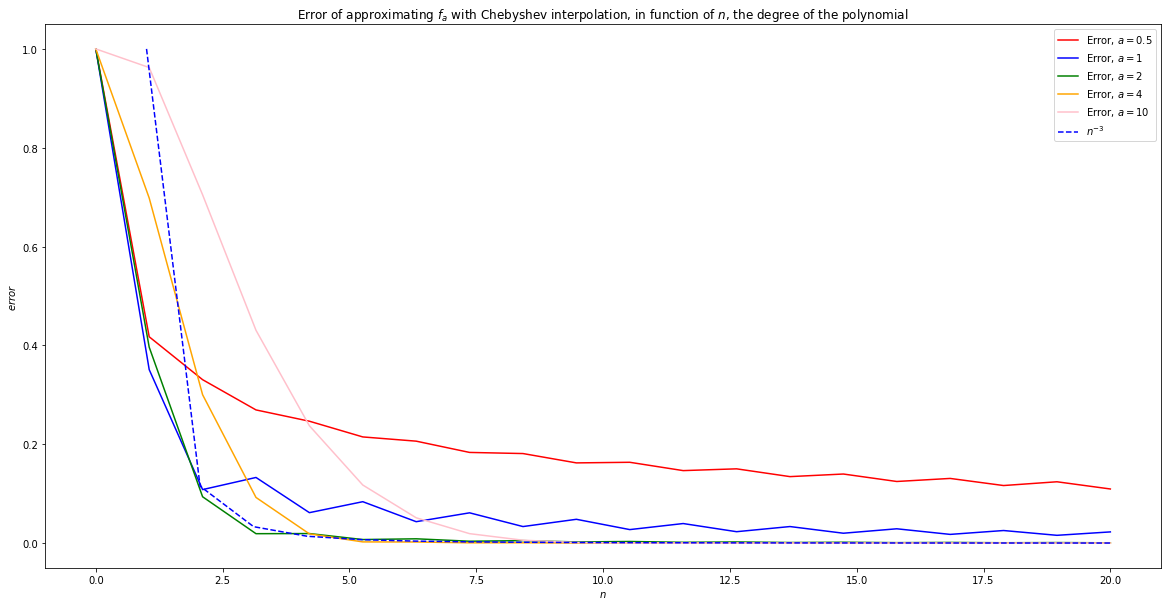

In [255]:
def error5(function1, function2, n):
    error=0
    for i in range(0,200):
        if np.absolute(function1[i]-function2[i]) > error:
            error=np.absolute(function1[i]-function2[i])
    return error

a1=0.5
e1=[]
help1=[]
for i in range(1,21):
    function2 = question5(a1,i)
    function1 = fun(a1,i)
    e1=e1+[error5(function1,function2,i)]
    help1=help1+[i]
a2=1
e2=[]
for i in range(1,21):
    function2 = question5(a2,i)
    function1 = fun(a2,i)
    e2=e2+[error5(function1,function2,i)]
a3=2
e3=[]
for i in range(1,21):
    function2 = question5(a3,i)
    function1 = fun(a3,i)
    e3=e3+[error5(function1,function2,i)]
a4=4
e4=[]
for i in range(1,21):
    function2 = question5(a4,i)
    function1 = fun(a4,i)
    e4=e4+[error5(function1,function2,i)]
    
a5=10
e5=[]
for i in range(1,21):
    function2 = question5(a5,i)
    function1 = fun(a5,i)
    e5=e5+[error5(function1,function2,i)]

fig=plt.figure(figsize=(20,10))    
plt.title('Error of approximating $f_a$ with Chebyshev interpolation, in function of $n$, the degree of the polynomial')
plt.xlabel('$n$')
plt.ylabel('$error$')
plt.plot(np.linspace(0,20,20),e1,'red',label="Error, $a=0.5$")
plt.plot(np.linspace(0,20,20),e2,'blue',label="Error, $a=1$")
plt.plot(np.linspace(0,20,20),e3,'green',label="Error, $a=2$")
plt.plot(np.linspace(0,20,20),e4,'orange',label="Error, $a=4$")
plt.plot(np.linspace(0,20,20),e5,'pink',label="Error, $a=10$")
plt.plot(np.linspace(1,20,19),np.power(np.linspace(1,20,19),-3),'b--',label="$n^{-3}$")
plt.legend()
plt.show()

#### First of all, the rate of convergence $r$ depends on the regularity of $f_a$ the following way: when $a<2$, the function is less regular than $a=2$, and $r$ decreases when $a$ decreases. Also when $a>2$, the function is more regular than $a=2$, but $r$ is constant!. So the "best case" for the convergence of the error is when $a>2$. Contrarily as the previous cases, we have convergence to $0$ for all $a>2$. It seems to be cubic convergence, as the curves follow a $n^{-r}, r=3$ tendency.

#### The only difference when $a$ increases is that the asymptotic regime starts later.

#### We also have the oscillation due to the parity of $n$.

#### It seems logical to have the same convergence when $a>2$, because we can see in the function plots above, that when $a>2$, it is really easy for the approximation polynomial to oscillate very precisely around $f_a$.